# Homework 2 Spatial Filter

## 1. การทดลองที่ 1 Noise Interference Generation

In [1]:
import rawpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

In [2]:
def readImagefromFile(filename):
    img = cv2.imread(str(filename))
    print(f"Shape in put image is {img.shape}")
    img_out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"Shape out put image gray-scale is {img_out.shape}")
    return img_out
def ImageSubplot(img_in,img_name,Title):
    fig, axs = plt.subplots(2, len(img_in), figsize=(30, 12))
    fig.suptitle(Title, fontsize=30)
    for i in range(len(img_in)):
        axs[0,i].imshow(img_in[i], cmap="gray", vmin=0, vmax=255)
        axs[0,i].set_xlabel(img_name[i], fontsize=15)
        axs[1,i].hist(img_in[i].flatten(),bins=256)
        axs[1,i].set_xlabel('Hist image '+ str(img_name[i]), fontsize=15)
    plt.show()

In [3]:
img = []
img_gray =  readImagefromFile("_MG_5488.jpg")
img.append(img_gray)

Shape in put image is (3648, 5472, 3)
Shape out put image gray-scale is (3648, 5472)


### 1.1

In [4]:
noise_type = ["s&p","gaussian"]
image_name = ["Original","s&p","gaussian"]

In [5]:
for i in range(len(noise_type)):
    Noise_img = random_noise(img_gray,mode = noise_type[i])
    output_img = (Noise_img*255).astype(np.uint8)
    img.append(output_img )

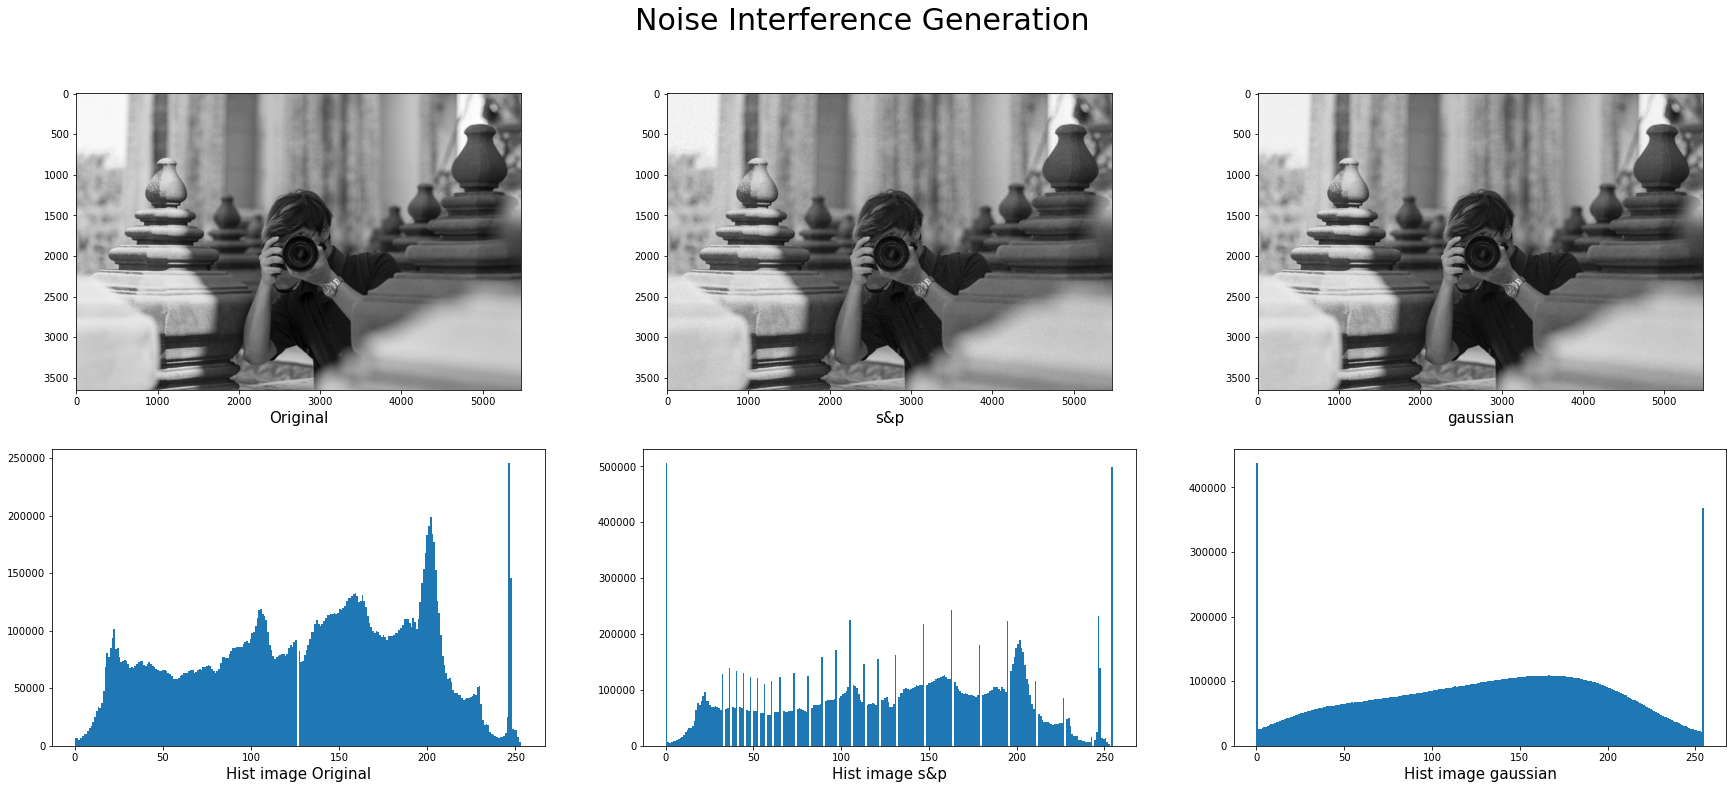

In [6]:
ImageSubplot(img,image_name,"Noise Interference Generation")

# 2. การทดลองที่ 2 Image Noise Reduction

In [7]:
def boxFiltering(img, filter_size):
    box_filter = np.ones((filter_size, filter_size))
    box_filter = (1/(filter_size*filter_size))*box_filter
    out_img = cv2.filter2D(img, -1, box_filter)
    return out_img
def gaussFiltering(img, filter_size):
    gauss_filter = cv2.getGaussianKernel(filter_size, -1)
    gauss_filter = gauss_filter * gauss_filter.T
    out_img = cv2.filter2D(img, -1, gauss_filter)
    return out_img

In [8]:
Box_filter_size = 50
img_noise_box_re1 = boxFiltering(img[1], Box_filter_size)
img_noise_box_re2 = boxFiltering(img[2], Box_filter_size)

In [9]:
img_noise_re_Box = []
img_noise_re_Box.append(img_gray)
img_noise_re_Box.append(img_noise_box_re1)
img_noise_re_Box.append(img_noise_box_re2)

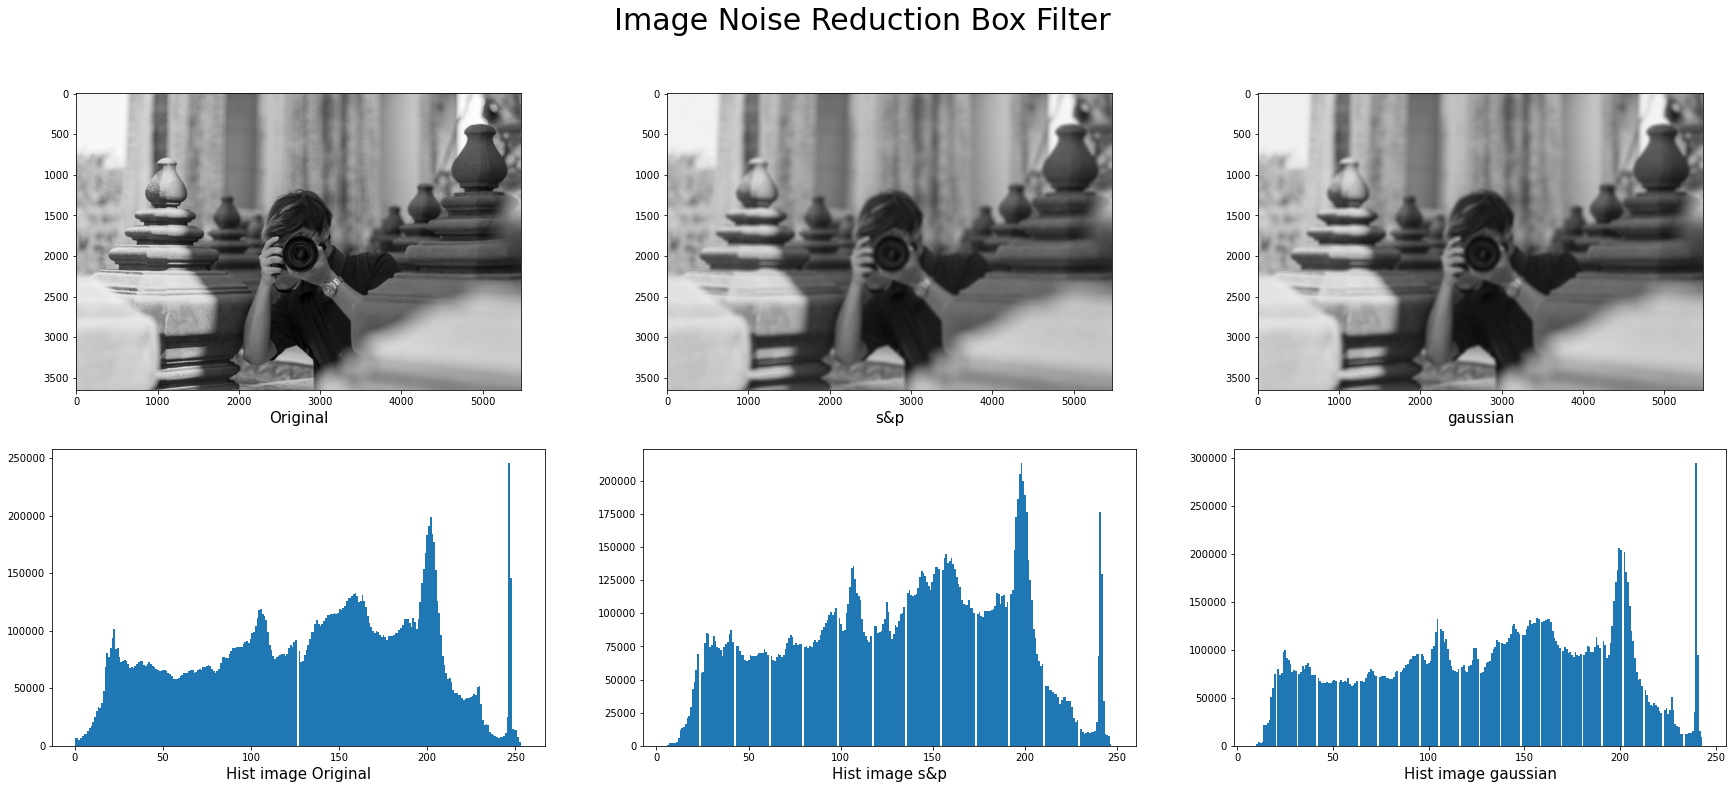

In [10]:
ImageSubplot(img_noise_re_Box,image_name,"Image Noise Reduction Box Filter")

In [11]:
Gauss_filter_size = 100
img_noise_Gauss_re1 = gaussFiltering(img[1], Gauss_filter_size)
img_noise_Gauss_re2 = gaussFiltering(img[2], Gauss_filter_size)

In [12]:
img_noise_re_Gauss = []
img_noise_re_Gauss.append(img_gray)
img_noise_re_Gauss.append(img_noise_Gauss_re1)
img_noise_re_Gauss.append(img_noise_Gauss_re2)

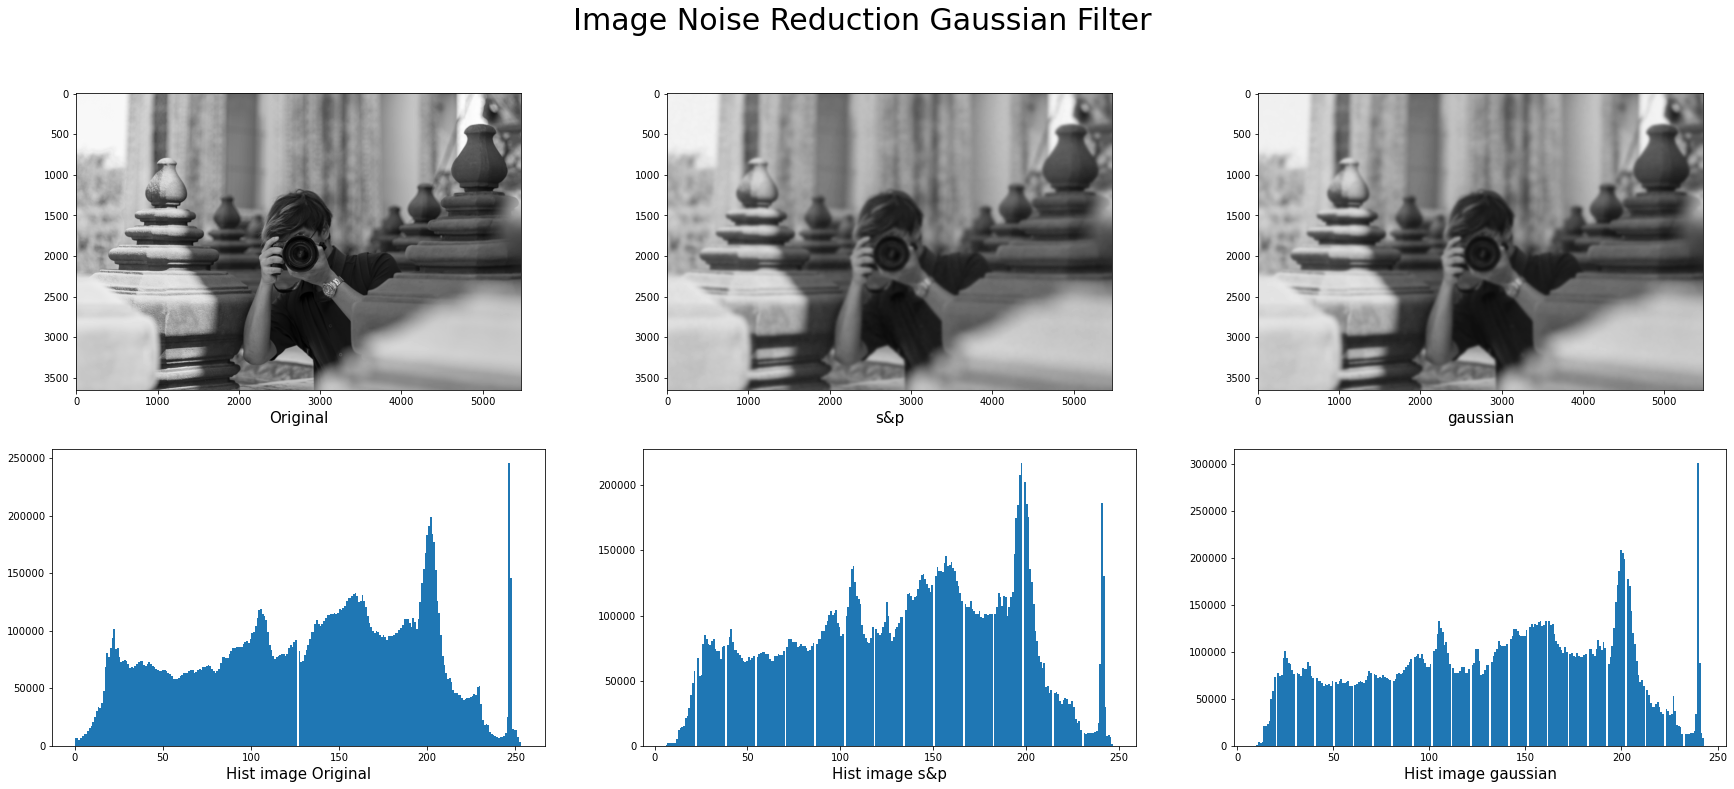

In [13]:
ImageSubplot(img_noise_re_Gauss,image_name,"Image Noise Reduction Gaussian Filter")

In [14]:
median_filter_size = 41
img_noise_median_re1 = cv2.medianBlur(img[1],median_filter_size)
img_noise_median_re2 = cv2.medianBlur(img[2], median_filter_size)

In [15]:
img_noise_re_median = []
img_noise_re_median.append(img_gray)
img_noise_re_median.append(img_noise_median_re1)
img_noise_re_median.append(img_noise_median_re2)

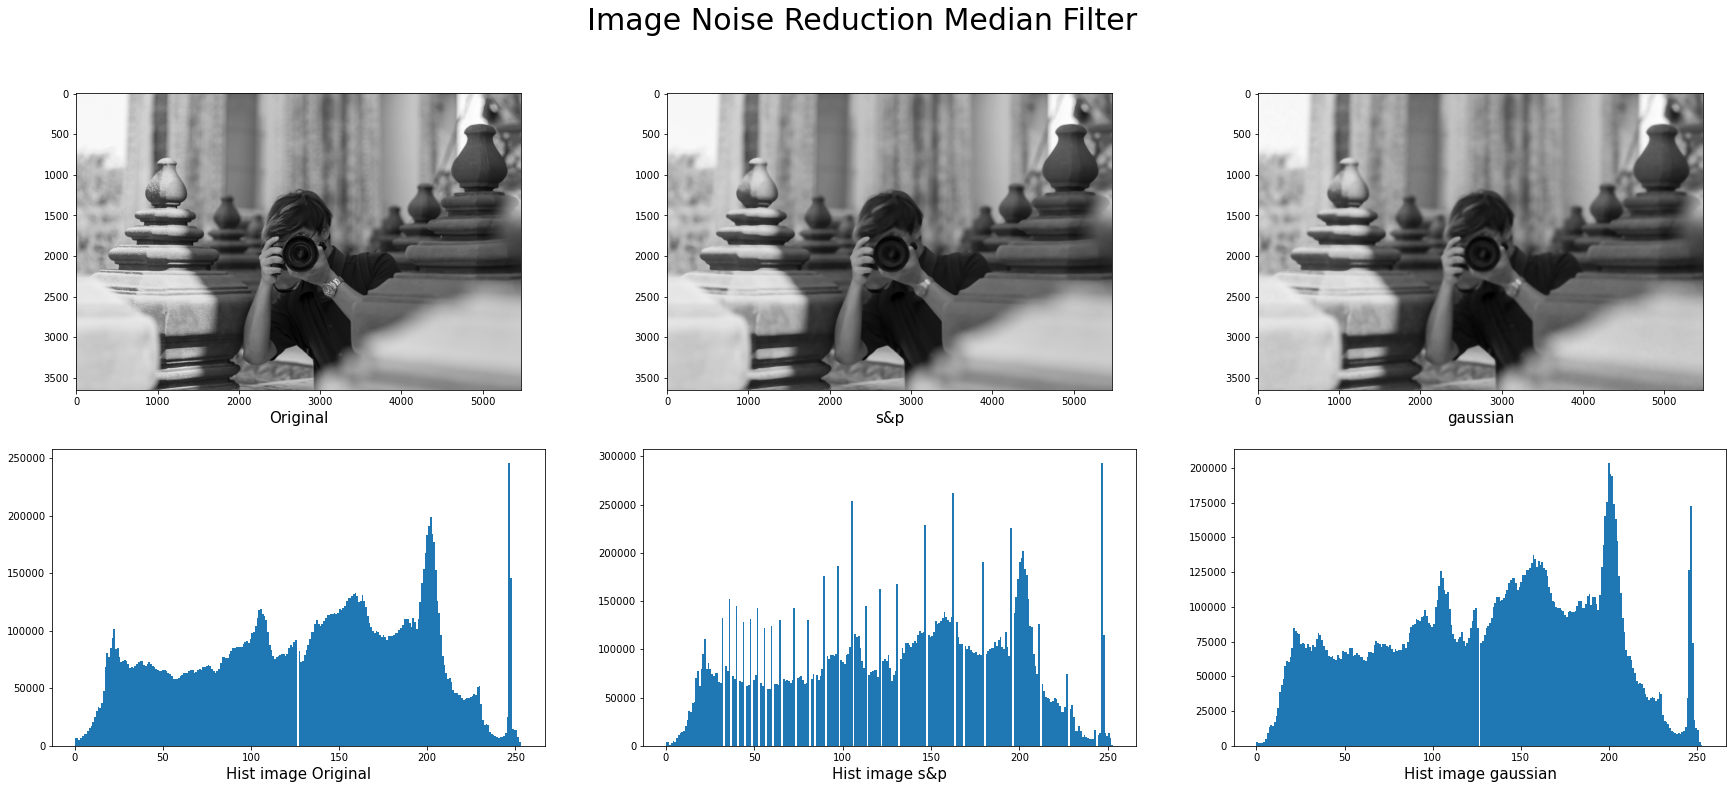

In [16]:
ImageSubplot(img_noise_re_median,image_name,"Image Noise Reduction Median Filter")

### ในการเลือกขนาด filter ได้พิจารณาจากกราฟ Histogram

## 2.2

In [17]:
def Filtering(img, filter_size,Coefficient):
    array_filter = np.random.randint(0,2,size=(filter_size, filter_size))
    array_filter = (Coefficient/(array_filter.sum()))*array_filter
    print(array_filter)
    print(array_filter.sum())
    print("===================================================================================")
    out_img = cv2.filter2D(img, -1, array_filter)
    return out_img

In [33]:
img_noise_filter_re1 = Filtering(img[1], 9,2)
img_noise_filter_re2 = Filtering(img[2], 9,0.5)

[[0.04761905 0.         0.         0.04761905 0.04761905 0.04761905
  0.04761905 0.         0.        ]
 [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.         0.         0.04761905]
 [0.         0.         0.04761905 0.04761905 0.04761905 0.
  0.04761905 0.04761905 0.        ]
 [0.04761905 0.04761905 0.         0.         0.04761905 0.
  0.04761905 0.         0.        ]
 [0.         0.04761905 0.04761905 0.04761905 0.         0.
  0.         0.04761905 0.        ]
 [0.04761905 0.         0.04761905 0.         0.04761905 0.
  0.         0.         0.04761905]
 [0.04761905 0.         0.04761905 0.         0.         0.04761905
  0.         0.04761905 0.        ]
 [0.         0.04761905 0.04761905 0.04761905 0.         0.
  0.04761905 0.         0.04761905]
 [0.         0.04761905 0.04761905 0.         0.04761905 0.
  0.04761905 0.         0.        ]]
2.0
[[0.         0.01315789 0.         0.         0.01315789 0.01315789
  0.         0.         0.        ]
 [0

In [34]:
img_noise_re_filter = []
img_noise_re_filter.append(img_gray)
img_noise_re_filter.append(img_noise_filter_re1)
img_noise_re_filter.append(img_noise_filter_re2)

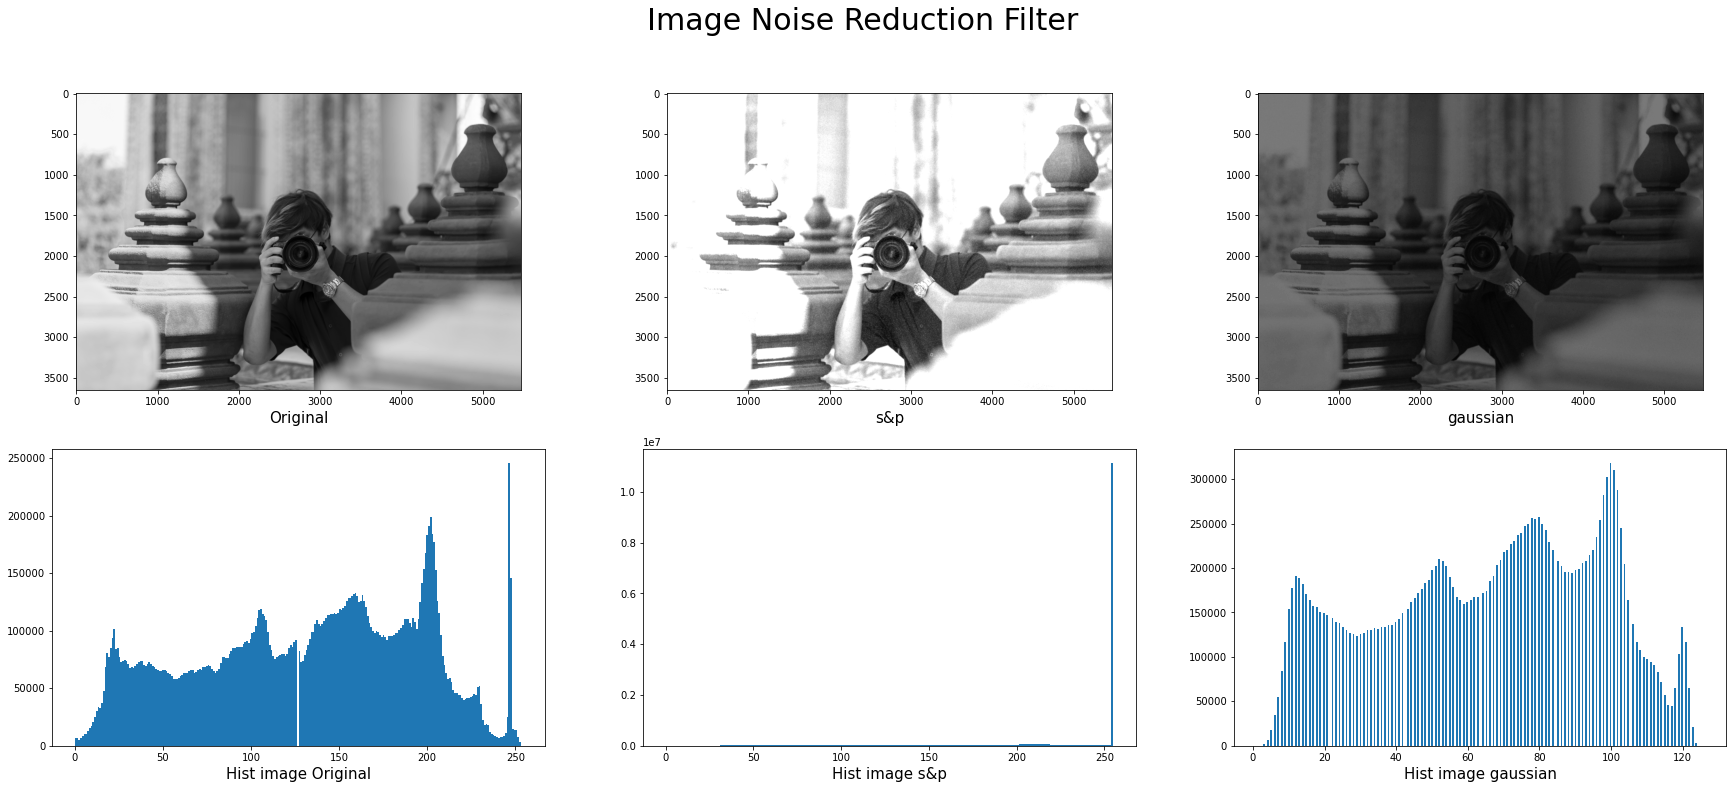

In [35]:
ImageSubplot(img_noise_re_filter,image_name,"Image Noise Reduction Filter")

### การใช้ขนาด Coefficient ที่อิสระ ทำให้ค่ามากเกินหรือน้อยเกินไปทำให้ภาพสว่างและมืดจนเสียข้อมูลในภาพหรืออีกในหนึ่งก็คือมีการขยายในส่วนที่มืดและสว่างมากเกินไป และ filter ที่ไม่ Symatric จะเป็นเหมือนการทำ Correlation ซึ่งที่เราทำ Covolution ได้เนื่อจากเมื่อ flip filter ทั้ง 2 ด้านเหมือนกัน แต่ในที่นี้ไม่ Symatric จึงไม่เหมือนการทำ Convolution

# 3. การทดลองที่ 3 Image Enhancement

## 3.1

In [21]:
def lpcSharpening(input_img):
    lpc_filter = np.array([[  0, -1,  0],
                           [ -1,  4, -1],
                           [  0, -1,  0]])
    edge_img = cv2.filter2D(input_img.astype(float),-1, lpc_filter)
    output_img = input_img + edge_img
    return output_img

In [22]:
img_En = []
img_En.append(img_gray)
output_img_lpc = lpcSharpening(img_En[0])
img_En.append(output_img_lpc)

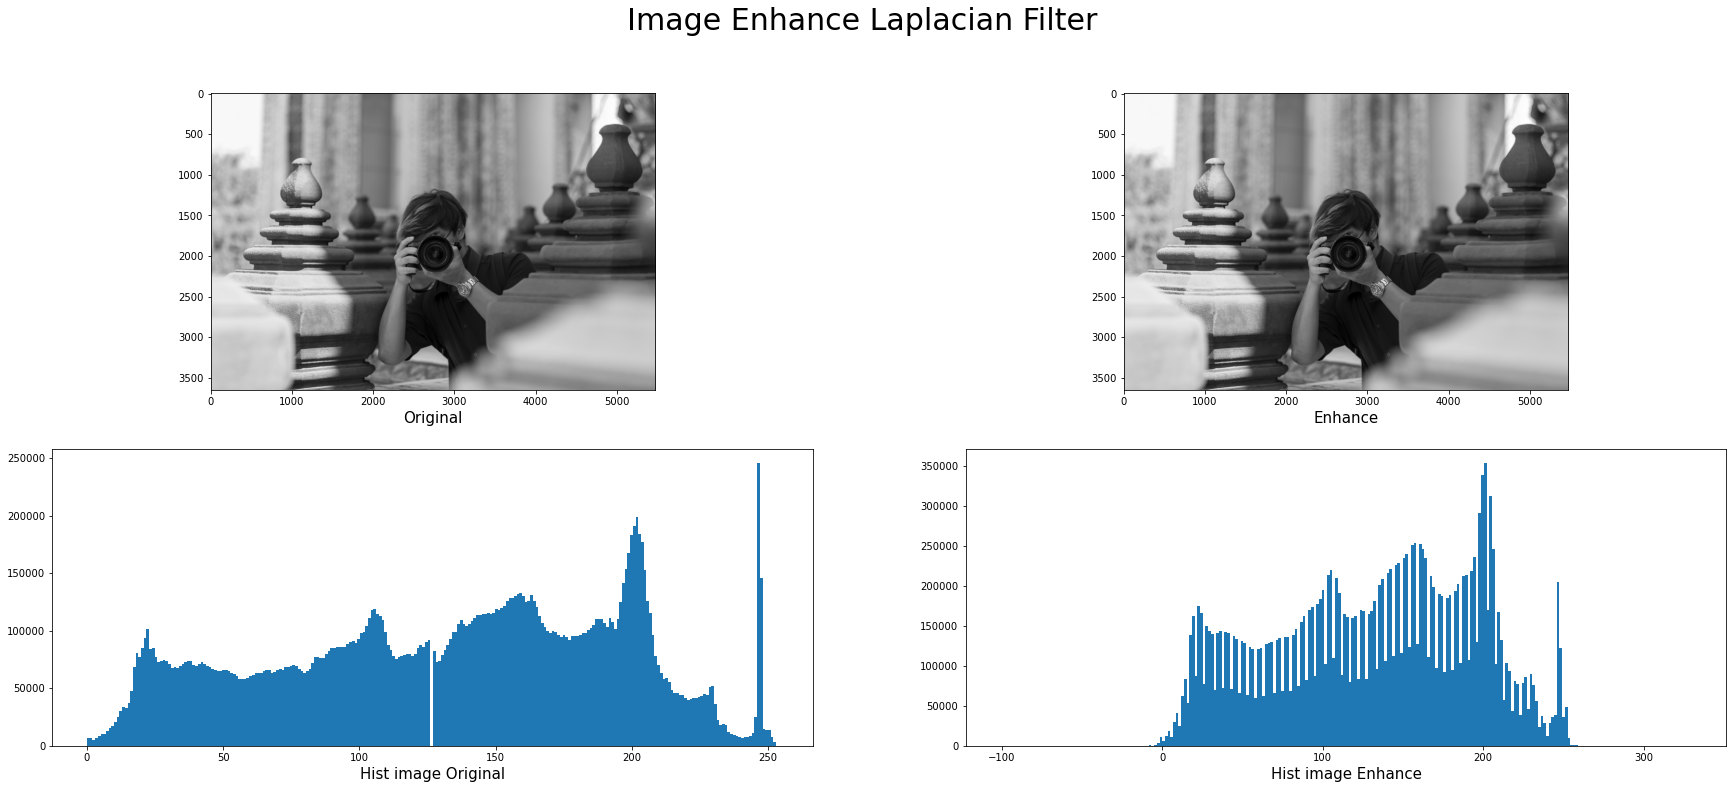

In [23]:
name = ["Original","Enhance"]
ImageSubplot(img_En,name,"Image Enhance Laplacian Filter")

# 3.2

In [24]:
# bluer image convert to float
for i in range(len(img_noise_re_Box)):
    #img_noise_re_median[i] = img_noise_re_median[i].astype(float)
    img_noise_re_Gauss[i] = img_noise_re_Gauss[i].astype(float)
    img_noise_re_Box[i] = img_noise_re_Box[i].astype(float)

In [25]:
# gmask(x,y) = f(x,y) - f(x,y)[blur]
Mask_image_Box = []
Mask_image_Gauss = []
#Mask_image_median = []
Mask_image_Box.append(img_gray)
Mask_image_Gauss.append(img_gray)
#Mask_image_median.append(img_gray)

for i in range(len(img_noise_re_Gauss)-1):
    Mask_Box = img_noise_re_Box[0] - img_noise_re_Box[i+1]
    Mask_Gauss= img_noise_re_Gauss[0] - img_noise_re_Gauss[i+1]
    #Mask_median = img_noise_re_median[0] - img_noise_re_median[i+1]
    Mask_image_Box.append(Mask_Box)
    Mask_image_Gauss.append(Mask_Gauss)
    #Mask_image_median.append(Mask_median)

In [26]:
#g(x,y) = f(x,y) + k*gmask(x,y)
image_Box = []
image_Gauss = []
#image_median = []
image_Box.append(img_gray)
image_Gauss.append(img_gray)
#image_median.append(img_gray)
kb = 1.5
kg = 1.25
km = 1.75
for i in range(len(Mask_image_Box)-1):
    Box = img_noise_re_Box[0] + kb*Mask_image_Box[i+1]
    Gauss= img_noise_re_Gauss[0] + kg*Mask_image_Gauss[i+1]
    #median = img_noise_re_median[0] + km*Mask_image_median[i+1]
    image_Box.append(Box)
    image_Gauss.append(Gauss)
    #image_median.append(median)

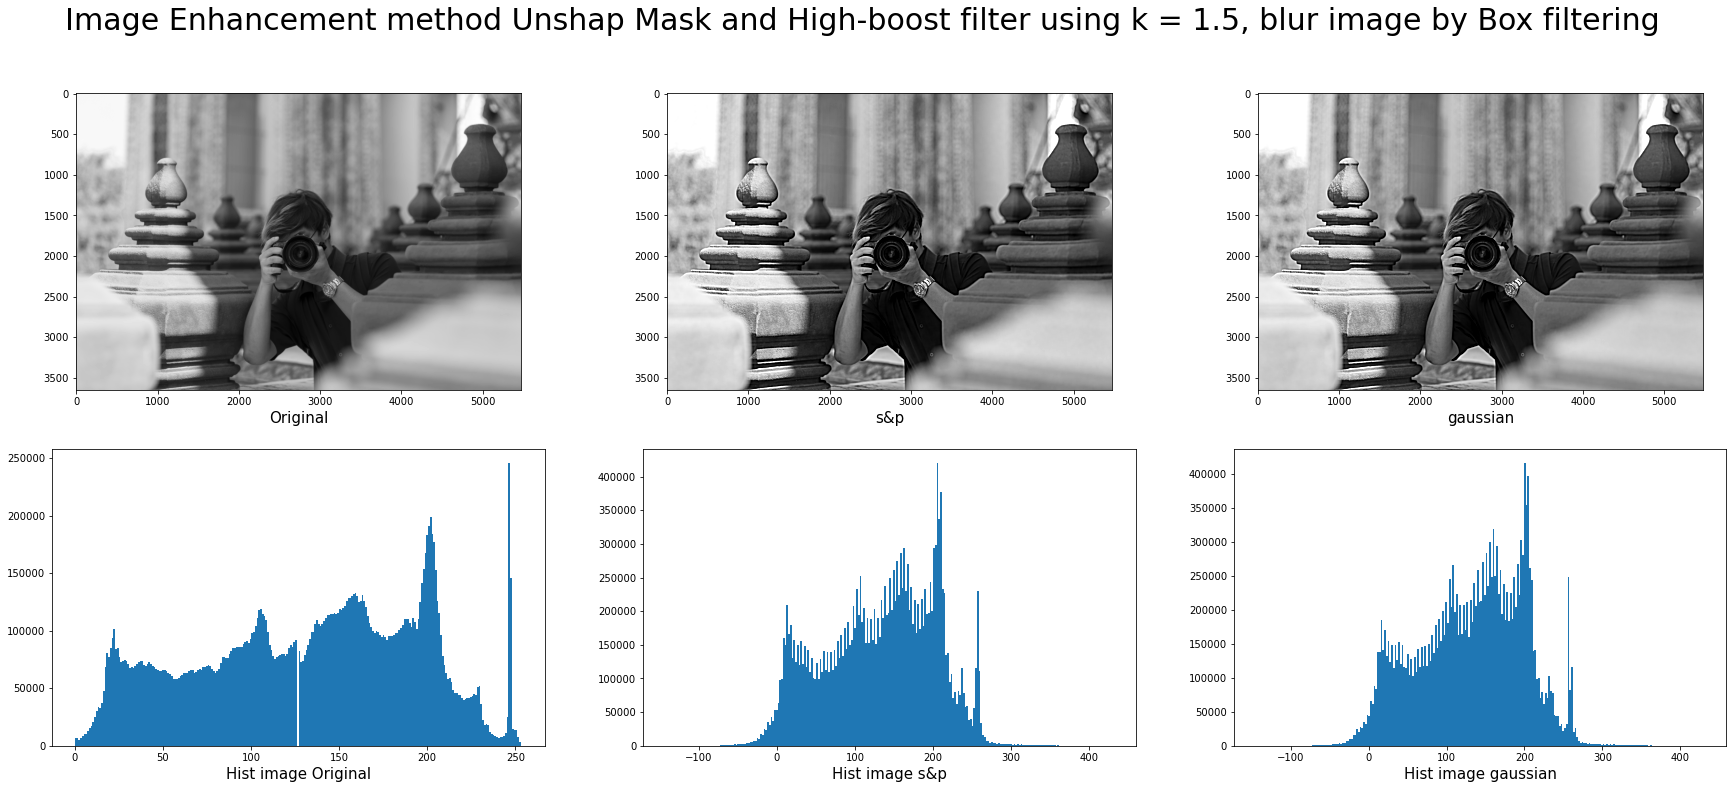

In [27]:
ImageSubplot(image_Box,image_name,f"Image Enhancement method Unshap Mask and High-boost filter using k = {kb}, blur image by Box filtering")

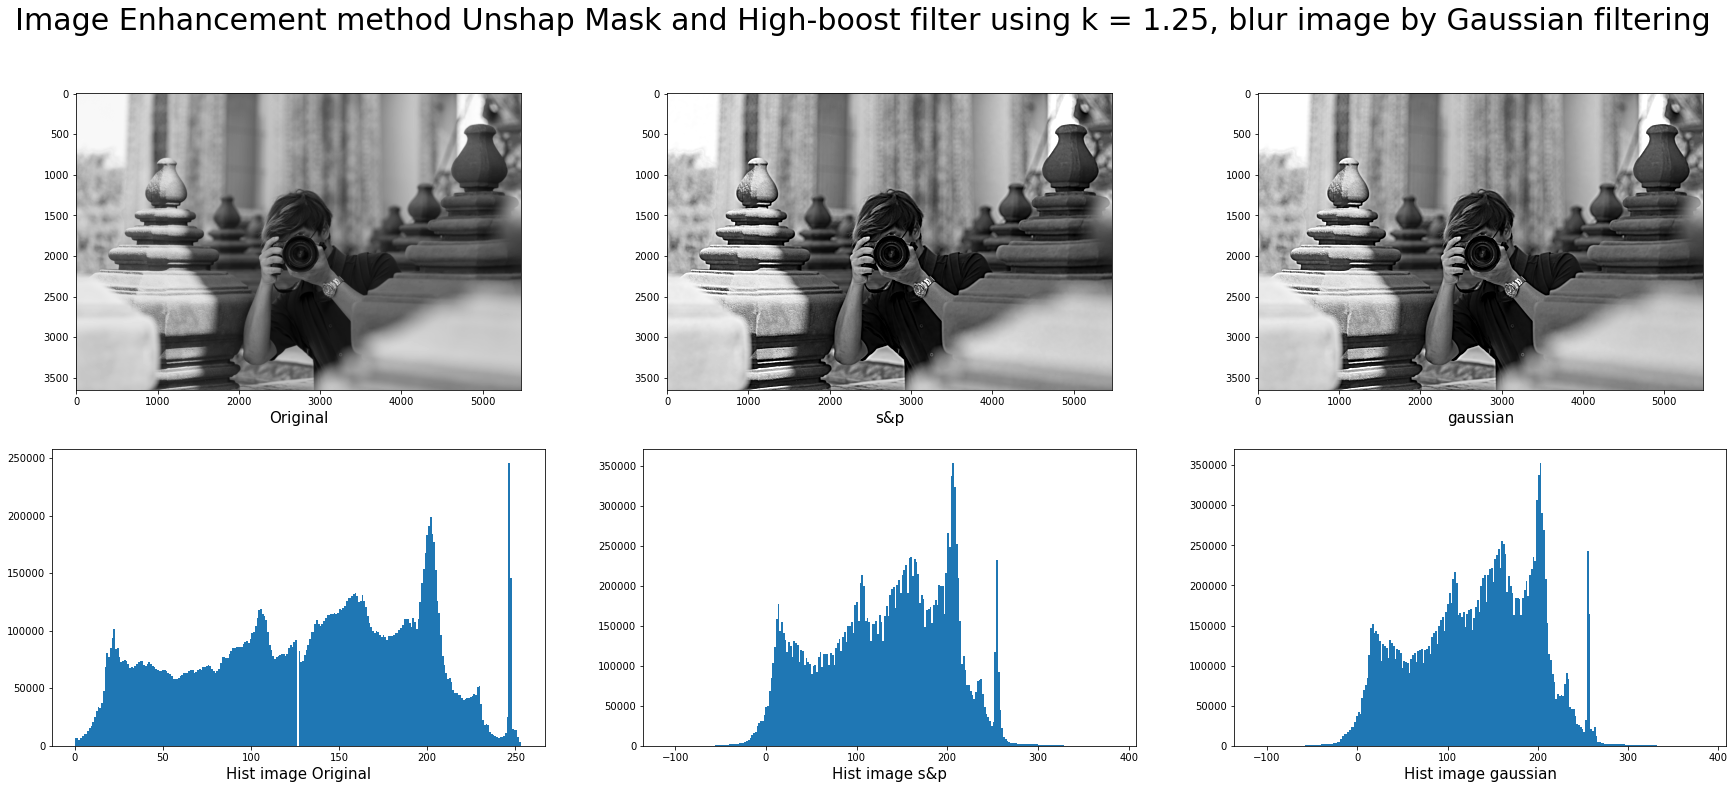

In [28]:
ImageSubplot(image_Gauss,image_name,f"Image Enhancement method Unshap Mask and High-boost filter using k = {kg}, blur image by Gaussian filtering")

### จากการเลือกค่า k > 1 จะเป็น hisg-boost filtering ซึ่งทำให้ภาพที่ได้มีความคมชัดมากขึ้นจึงเลือกใช้ k = 1.5 แต่ถ้าใช้ค่า k < 1 จะเป็นการ unsharp mask ทำให้ภาพไม่มีความคมชัด

## 3.3

In [29]:
def autoSigma(kernel_size):
    sigma = 0.3*(((kernel_size-1)*0.5) - 1) + 0.8
    return sigma

In [30]:
d = 50
sigma_space = autoSigma(d)
sigma_color = autoSigma(255//2)
output_img = cv2.bilateralFilter(img_gray, d,sigma_color,sigma_space)

In [31]:
img_En_Bilat = []
img_En_Bilat.append(img_gray)
img_En_Bilat.append(output_img)

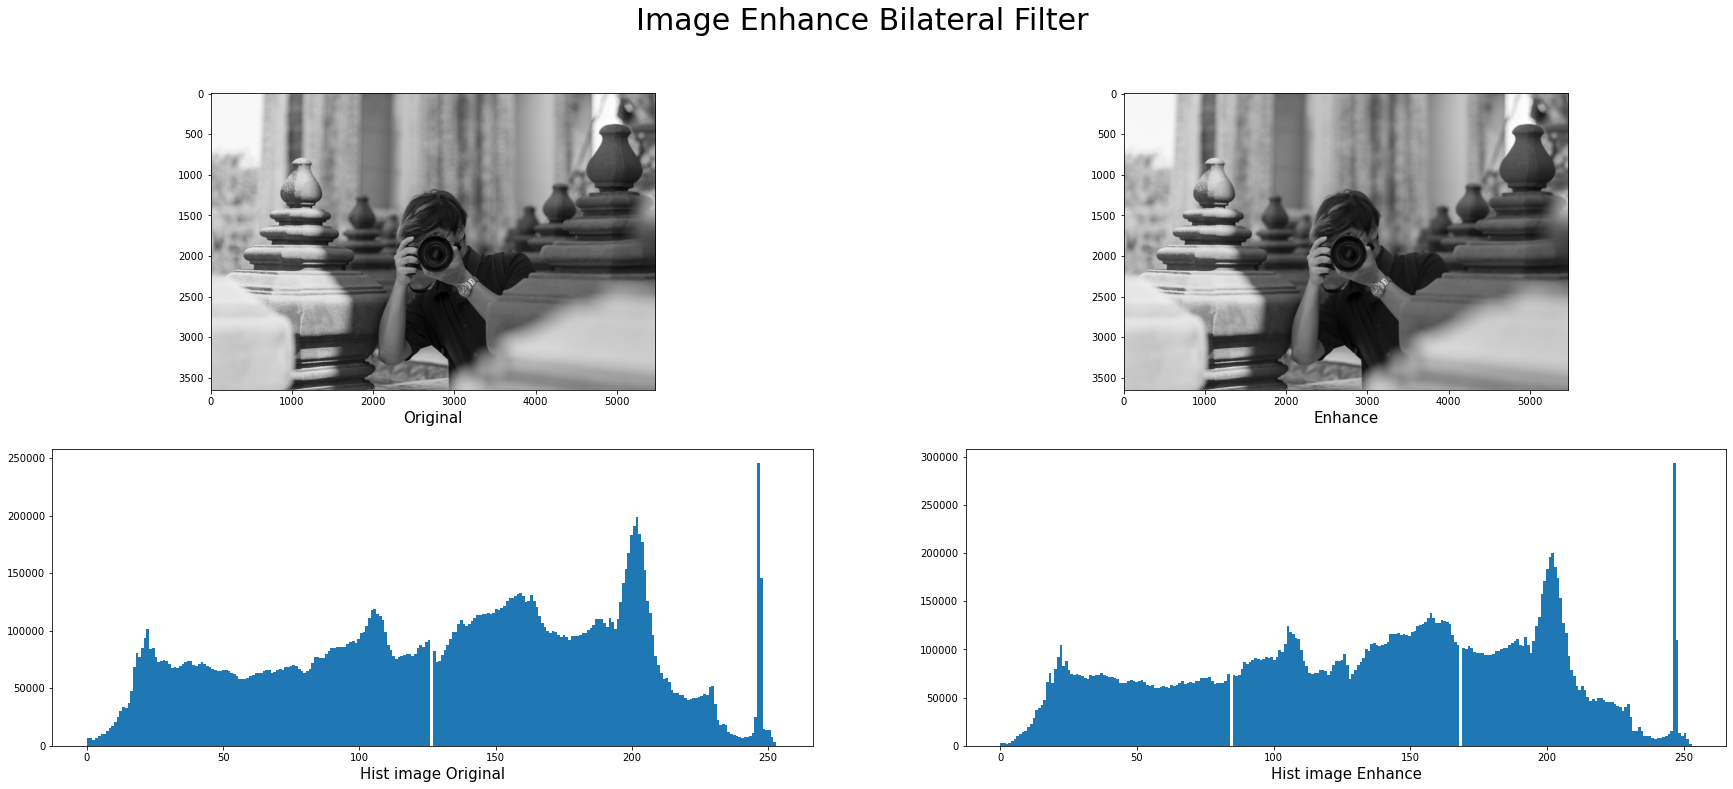

In [32]:
ImageSubplot(img_En_Bilat,name,"Image Enhance Bilateral Filter")

### ใช้ ฺBilateral Filter ยังสามารถเก็บความละเอียดของภาพไม่ทำให้ส่วนที่อยากจะเก็บนั้นหายไป

## 3.4

### วิธีในข้อ 3.1 Second-order Derivatives(Laplacian) เป็นวิธีที่ง่ายที่สุดในการทำ Enhancement หลักการทำคือเพิ่มค่าให้สูงขึ้นและกดค่าที่ตำ่ให้ตำ่ลงไปอีก
### 3.2 Unsharp Masking and High-boost Filtering เป็นการนำภาพต้นฉบับมา blur เพื่อทำ low-pass filter และนำภาพต้นฉบับไปลบภาพที่ blur เพื่อตัดส่วน  low-pass ออกแล้วเก็บเฉพาะ high-pass หลังจากนั้นนำ high-pass ไปขยายด้วยค่า k ซึ่งค่า k > 1 จะ High-boost Filtering  แต่ถ้า k < 1 จะเป็นการ Unsharp Masking และนำส่วน high-pass ที่ขยายไปรวมกับภาพต้นฉบับทำให้ภาพคมชัดขึ้น
### 3.3 Bilateral Filter เป็นการตัดกราฟ Gaussian ในส่วนที่มีความต่างของภาพเพื่อไม่ให้เกิดการไล่ระดับของค่าความต่างทำให้ค่าความต่างยังต่างเหมือนเดิมและยังไม่ทำให้ข้อมูลของภาพที่ต้องการเสียหาย